<a href="https://colab.research.google.com/github/enzo-vargas/EnzoVargas_DataScience/blob/master/Analisando_a_viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os crimes no Rio de Janeiro

<center><img alt="Tropa de elite" width="50%" src=https://github.com/enzo-vargas/-Datasets--Enzo_Vargas-Data_Science/blob/master/Analisando%20os%20crimes%20do%20RJ.jpg?raw=true></center>

Há um esteriótipo que corre o país interio que diz que o Rio de Janeiro é um lugar muito bonito e possui ótimos pontos turísticos, mas deve andar atento pois pode ser assaltado a qualquer momento. Inclusive, se você é um turista e resolve faezr uma viagem com um guia turístico, provavelmente irá receber uma plaquinha com alguns "cuidados" ao andar pela cidade. Mas como disse, são esteriótipos, muitas vezes a realidade é muito diferente da expectativa que é apresentada a nós. Os principais canais de comunicação tem uma boa parcela de culpa nessa visão que temos do Rio de ser uma cidade muito arriscada. Mas o que os dados tem a dizer sobre isso? Qual é a real situação do Rio de Janeiro?

## 1 - Tratamento dos dados

Os dados foram obtidos através do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas aqui divulgadas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

### 1.1 Importação dos dados

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
#importar o conjunto de dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Aqui podemos conferir as 5 primeiras entradas do nosso conjunto de dados que recebe o nome de `df`, utilizando a função `head()`

### 1.2 Limpeza dos dados

Antes de começarmos a tirar qualquer dado relevante ou plotar algum gráfico, precisamos limpar nosso conjunto de dados de valores nulos (que irão atrapalhar a nossa análise)

In [46]:
#Verificando o formato do nosso conjunto de dados (linhas, colunas)
df.shape

(344, 56)

Ok, agora iremos fazer três coisas:
* Analisar a porcentagem de valores nulos em cada coluna do nosso conjunto de dados
* Criar a variável `column_drop` com os valores nulos e transformá-la em uma lista
* Tirar as colunas que estão em `column_drop` de `df`

#### 1 - Porcentagem de valores nulos

Os valores abaixo são a porcentagem de entradas nulas em cada coluna. Perceba que a coluna que tem a menor taxa de entradas ausentes ainda está na casa dos 24%. O que é um valor considerável e pode afetar nos resultados.

In [47]:
#Analisar a porcentagem de valores nulos em cada coluna
nulos = ((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False))
nulos

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


#### 2 - Separar as colunas com entradas nulas

Separei as primeiras 30 linhas da variável `nulos` em outra variável `column_drop` que usarei como referência na hora de tirar as colunas do nosso conjunto de dados original

In [48]:
#Separar as colunas com entradas nulas na variável column_drop
column_drop = nulos[:30]
column_drop

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Em seguida, transformei `column_drop` em uma lista usando o método `tolist()`

In [49]:
#Transformar as colunas em listas
column_drop = column_drop.index.tolist()
column_drop

['roubo_bicicleta',
 'furto_bicicleta',
 'apreensao_drogas_sem_autor',
 'posse_drogas',
 'apf',
 'aaapai',
 'cmp',
 'trafico_drogas',
 'cmba',
 'sequestro_relampago',
 'furto_coletivo',
 'extorsao',
 'furto_celular',
 'roubo_apos_saque',
 'roubo_conducao_saque',
 'roubo_cx_eletronico',
 'estupro',
 'estelionato',
 'pol_civis_mortos_serv',
 'pol_militares_mortos_serv',
 'pessoas_desaparecidas',
 'encontro_ossada',
 'roubo_celular',
 'lesao_corp_culposa',
 'ameaca',
 'sequestro',
 'lesao_corp_morte',
 'registro_ocorrencias',
 'hom_por_interv_policial',
 'hom_culposo']

#### 3 - Tirar as colunas que estão em `column_drop` de `df`

In [0]:
#tirar as colunas contidas na lista do dataframe original
df.drop(column_drop,axis=1,inplace=True)

In [51]:
#Verificando a quantidade de valores nulos em cada coluna, agora, sem as colunas que foram retiradas
df.isnull().sum()

vano                    0
mes                     0
hom_doloso              0
latrocinio              0
tentat_hom              0
lesao_corp_dolosa       0
roubo_comercio          0
roubo_residencia        0
roubo_veiculo           0
roubo_carga             0
roubo_transeunte        0
roubo_em_coletivo       0
roubo_banco             0
outros_roubos           0
total_roubos            0
furto_veiculos          0
furto_transeunte        0
outros_furtos           0
total_furtos            0
apreensao_drogas        0
recuperacao_veiculos    0
encontro_cadaver        0
indicador_letalidade    0
indicador_roubo_rua     0
indicador_roubo_veic    0
fase                    0
dtype: int64

Aqui já podemos notar duas diferenças:
* O número de colunas caiu de 56 para 26
* Não há mais entradas nulas (NaN)

In [52]:
print(df.shape)
df.head()

(344, 26)


,vano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
0,1991,1,657,15,162,3051,350,188,1174,63,967,381,37,158,3318,2009,1147,3561,6717,133,872,217,672,1348,1174,3
1,1991,2,732,17,175,3421,357,171,1097,64,963,432,35,142,3261,1850,1066,3309,6225,127,751,209,749,1395,1097,3
2,1991,3,713,25,216,3613,443,191,1265,71,963,422,43,131,3529,2084,1062,3573,6719,80,789,188,738,1385,1265,3
3,1991,4,634,20,200,3211,425,199,1415,81,1186,354,36,112,3808,2085,1195,3290,6570,133,787,140,654,1540,1415,3
4,1991,5,650,20,146,3051,553,231,1449,82,931,335,27,147,3755,2185,723,3546,6454,163,845,78,670,1266,1449,3


#### 4 - Tratar as colunas de data

1.   Renomear a coluna `vano` para `ano` 
2.   criar a coluna `data` com a junção de `mes` e `ano`
3.   convertê-la para o formato `datetime`

In [53]:
#renomear a coluna 'vano' para 'ano'
df.rename(columns={'vano':'ano'},inplace=True)
#criar a coluna 'data' com a junção das colunas 'ano' e 'mes'
df['data'] = df.mes.astype(str) + '/' + df.ano.astype(str)
#converter para datetime
df.data = pd.to_datetime(df.data,format='%m/%Y')
df.dtypes

ano                              int64
mes                              int64
hom_doloso                       int64
latrocinio                       int64
tentat_hom                       int64
lesao_corp_dolosa                int64
roubo_comercio                   int64
roubo_residencia                 int64
roubo_veiculo                    int64
roubo_carga                      int64
roubo_transeunte                 int64
roubo_em_coletivo                int64
roubo_banco                      int64
outros_roubos                    int64
total_roubos                     int64
furto_veiculos                   int64
furto_transeunte                 int64
outros_furtos                    int64
total_furtos                     int64
apreensao_drogas                 int64
recuperacao_veiculos             int64
encontro_cadaver                 int64
indicador_letalidade             int64
indicador_roubo_rua              int64
indicador_roubo_veic             int64
fase                     

## 2 - Crimes Contra o Patrimônio - Veículos

Vamos dedicar essa sessão para o crime contra veículos pessoais. Como veículos roubados, furtados e saber também qual a taxa de recuperação dos veículos

### 2.1 Análise dos dados

#### 1 - A média de cada coluna

In [54]:
#printar a média de roubo, furto e recuperção de veículos
print(f'Média de roubo dos veículos:\t\t{round(df.roubo_veiculo.mean(),2)}')
print(f'Média de furto dos veículos:\t\t{round(df.furto_veiculos.mean(),2)}')
print(f'Média de recuperação dos veículos:\t{round(df.recuperacao_veiculos.mean(),2)}')

Média de roubo dos veículos:		2448.7
Média de furto dos veículos:		1674.67
Média de recuperação dos veículos:	1772.24


#### 2 - Porcentagem de recuperação de veículos

* Qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

In [65]:
#Criar uma coluna com porcentagem de veículos recuperados
df['taxa_recuperacao'] = round(df.recuperacao_veiculos*100 / (df.roubo_veiculo+df.furto_veiculos),2)
df.taxa_recuperacao.sort_values(ascending=False)

331    63.45
136    59.99
316    59.72
148    59.53
138    59.40
       ...  
17     20.46
21     19.56
24     19.48
26     18.31
25     18.17
Name: taxa_recuperacao, Length: 342, dtype: float64

### 2.2 Visualição dos dados

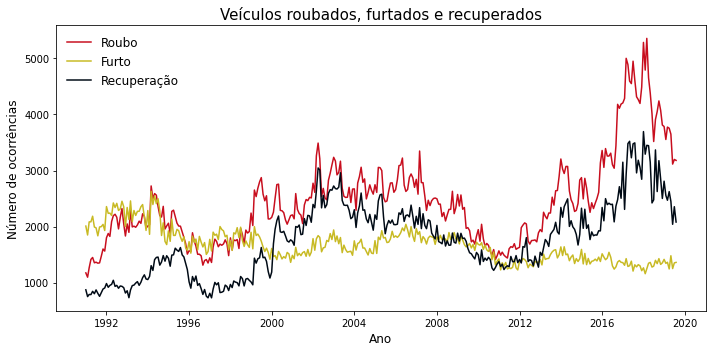

In [56]:
#Plotar um gráfico com a média de roubo, furto e recuperção de veículos
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df.data, df.roubo_veiculo, label= 'Roubo', color= [200/255,14/255,30/255])
ax.plot(df.data, df.furto_veiculos, label= 'Furto', color= [200/255,186/255,36/255])
ax.plot(df.data, df.recuperacao_veiculos, label= 'Recuperação', color= [0/255,10/255,21/255])

plt.ylabel('Número de ocorrências',fontsize=12)
plt.xlabel('Ano',fontsize=12)

plt.title('Veículos roubados, furtados e recuperados',fontsize=15,)
plt.legend(frameon=False,fontsize=12)
plt.tight_layout()

plt.show()

Através desse gráfico podemos notar que:
* A taxa de roubo apresenta uma leve queda em 2010 com menos de 2000 ocorrências mas sobe drasticamente e [alcança sua maior marca em 2018](http://brasilcaminhoneiro.com.br/roubo-de-veiculos-recorde-rio/) com mais de 5000 ocorrências
* A taxa de recuperação acompanha a linha de roubo, mas em uma proporção menor. O que representa um bom tarbalho da polícia em recuperar os veículos, mas muitas ocorrêcias ainda tem um final ruim
* A taxa de furto apresenta uma leve queda nos anos 90 e segue abaixo das 2000 ocorrências anuais até 2020

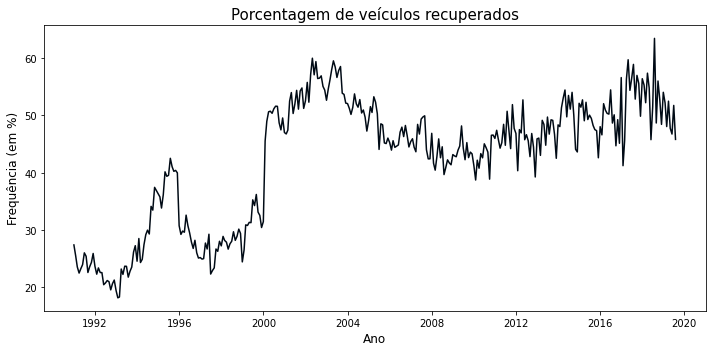

In [66]:
#Plotar um gráfico com a porcentagem de veículos recuperados
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(df.data,df.taxa_recuperacao,color= [0/255,10/255,21/255])

plt.ylabel('Frequência (em %)',fontsize=12)
plt.xlabel('Ano',fontsize=12)

plt.title('Porcentagem de veículos recuperados',fontsize=15)
plt.tight_layout()

plt.show()

Pela porcentagem de veículos recuperados, podemos notar que houve um aumento expressivo em 2000 que empurrou a média para cima e se manteve até os dias atuais, mostrando um bom trabalho da força policial na recuperação dos veículos

## 3 - Homicídio

Vamos dedicar essa sessão para o crime contra vida. Como homicídio doloso, tentativa de homicídio e analisar também o indicador de letalidade

### 3.1 Análise dos dados 

#### 1 - Outliers

Antes de trabalhar com essas variáveis, vamos identificar a presença de outliers (valores fora de série)

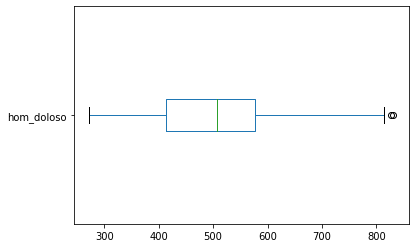

In [58]:
#Plotando um boxplot para hom_doloso antes de retirar os outliers
df.hom_doloso.plot(kind='box',vert=False);

De acordo com o Boxplot, as bolinhas que estão após a máxima são consideradas outliers
<center><img alt="Boxplot explicação" width="45%" src=https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/boxplot-1-1024x664.png?resize=1024%2C664></center>

Usando o método `describe()` podemos conferir alguns valores representados graficamente pelo boxplot como:
* média `mean`
* mínima `min`
* 1º quartil `25%`
* mediana `50%`
* 3º quartil `75%`
* máxima `max`

In [59]:
df.hom_doloso.describe()

count    344.000000
mean     504.555233
std      113.774481
min      272.000000
25%      413.750000
50%      507.000000
75%      577.250000
max      831.000000
Name: hom_doloso, dtype: float64

Já vimos que aquelas bolinhas são outliers. Mas a partir de qual valor o Boxplot considera uma entrada um outliers? Bom, vamos utilizar a função abaixo para descobrir esse valor
<center><img alt="Fórmula outlier" width="15%" src=https://latex.codecogs.com/png.latex?%5Csum%20Q3%5CDelta%20Q%20x%201%2C5></center>


In [60]:
#Calculando o número a se considerar Outlier
outliers_hom_doloso = 577.25 + (577.25 - 413.75) * 1.5
outliers_hom_doloso

822.5

Vamos retirar todos os valores acima de 822.5 do nosso conjunto de dados

In [0]:
#Tirando os outliers do Dataframe
df.drop(df[df.hom_doloso > 822.5].index, axis=0, inplace= True)

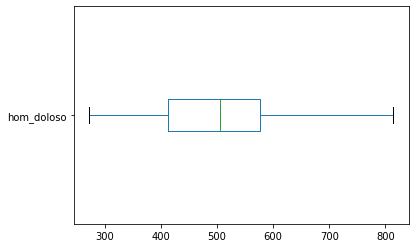

In [62]:
#Plotando o boxplot para hom_doloso novamente, sem os outliers
df.hom_doloso.plot(kind='box',vert=False);

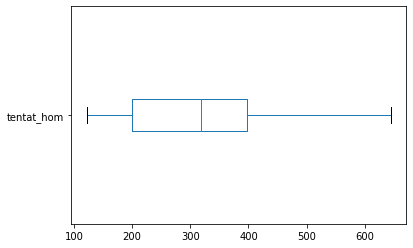

In [34]:
#Plotando um boxplot para tentat_hom
df.tentat_hom.plot(kind='box',vert=False);

#### 2 - Valores da coluna `hom_doloso`

In [79]:
print(f'Número máximo de homicídio:\t{df.hom_doloso.max()}')
print(f'Número mínimo de homício:\t{df.hom_doloso.min()}')
print(f'Média de homício doloso:\t{round(df.hom_doloso.mean(),2)}')

Número máximo de homicídio:	814
Número mínimo de homício:	272
Média de homício doloso:	502.66


Perceba que a média foi reduzida com a retirada dos outliers

### 3.2 Visualização dos dados

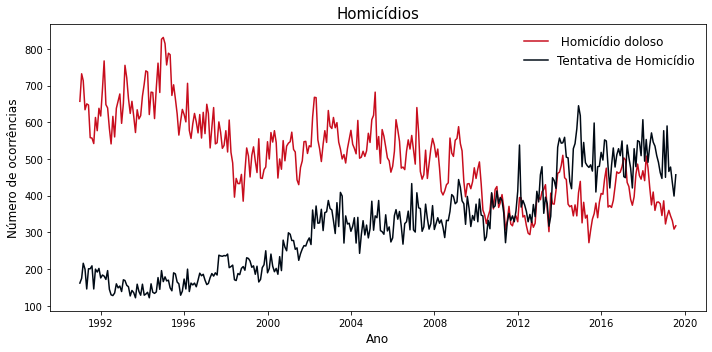

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df.data, df.hom_doloso, label= ' Homicídio doloso', color= [200/255,14/255,30/255])
ax.plot(df.data, df.tentat_hom, label= 'Tentativa de Homicídio', color= [0/255,10/255,21/255])

plt.ylabel('Número de ocorrências',fontsize=12)
plt.xlabel('Ano',fontsize=12)

plt.title('Homicídios',fontsize=15,)
plt.legend(frameon=False,fontsize=12)
plt.tight_layout()

plt.show()

Através deste gráfico podemos notar que:
* Ao longo dos anos os homicídios se tornaram cada vez mais mal-sucedidos em comparação com as tentaivas. Isso se deriva de n motivos, 
* A taxa de homicídios dolosos está sofrendo uma queda considerável em contraste com uma alta na taxa de tentativa de homicídio, significa que muitas vidas escaparam da morte

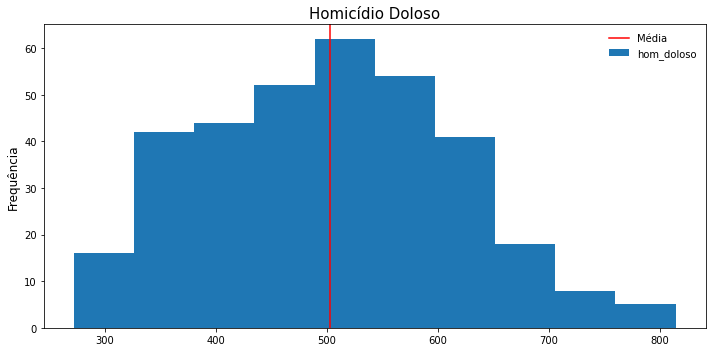

In [67]:
df.hom_doloso.plot.hist(figsize=(10,5))
plt.axvline(df.hom_doloso.mean(),c='Red',label='Média')
plt.title('Homicídio Doloso',fontsize=15)
plt.legend(frameon = False)
plt.ylabel('Frequência',fontsize=12)
plt.tight_layout()
plt.show()

Através deste histograma de homícidios dolosos nota-se que a frequência em que a quantidade de ocorrências aparece está distribuída no conjunto de dados com alguns valores maiores que não ocupam um espaço considerável no histograma 

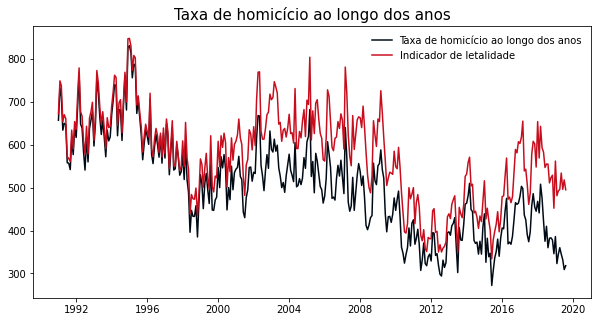

In [29]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(df.data,df.hom_doloso,label='Taxa de homicício ao longo dos anos',color= [0/255,10/255,21/255])
ax.plot(df.data,df.indicador_letalidade,label='Indicador de letalidade',color= [200/255,14/255,30/255])
plt.title('Taxa de homicício ao longo dos anos',fontsize=15)
plt.legend(frameon=False)
plt.show()

Vemos que a taxa de homicídios dolosos está ligada ao indicador de letalidade do Rio de Janeiro. Nota-se que desde de 2009, o Rio mostra-se uma cidade cada vez menos letal

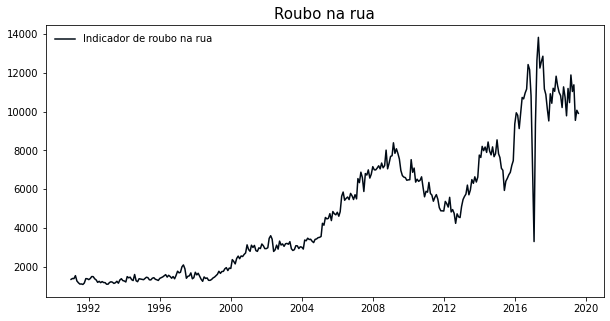

In [78]:
fig,ax = plt.subplots(figsize=(10,5))

#ax.plot(df.data,df.roubo_em_coletivo,label='Roubo em coletivo',color= [0/255,10/255,21/255])
ax.plot(df.data,df.indicador_roubo_rua,label='Indicador de roubo na rua',color= [0/255,10/255,21/255])
#ax.plot(df.data,df.indicador_roubo_veic,label='indicador de roubo de veículo',color= [255/255,100/255,10/255])
plt.title('Roubo na rua',fontsize=15)
plt.legend(frameon=False)
plt.show()


Podmeos analisar que o número de assaltos na rua aumentaram consideravelmente desde 2005, [atingindo seu pico em 2019](https://noticias.uol.com.br/cotidiano/ultimas-noticias/2019/05/20/rio-tem-recorde-de-roubos-de-rua-e-mortes-em-confronto-homicidios-caem.htm)

# Conclusão

Pelo que vimos, os dados nos trouxeram informações valiosas da atual situação do Rio. Podemos dizer que não é um lugar perigoso como os jornais apontam ou as pessoas de outros estados imaginam mas não se deve perambular pelas ruas com seus pertencens sem nenhum cuidado.

Insights do projeto:
* Média de roubo dos veículos:		2448.7
* houve um aumento expressivo no ano 2000 que empurrou a média para cima e se manteve até os dias atuais, mostrando um bom trabalho da força policial na recuperação dos veículos
* Média de homício doloso:	502.66
* A taxa de homicídios dolosos está sofrendo uma queda considerável em contraste com uma alta na taxa de tentativa de homicídio, significa que muitas vidas escaparam da morte
* desde de 2009, o Rio mostra-se uma cidade cada vez menos letal
* o número de assaltos na rua aumentaram consideravelmente desde 2005, atingindo seu pico em 2019

Bom, era isso! Caso queira ver mais projetos assim, me siga no [LinkedIn](https://www.linkedin.com/in/enzo-vargas/)

Se você procura por conteúdos como esse de uma forma bem detalhada e descontraída, me siga no [Medium](https://medium.com/@enzovargas)